 # Correlation
 When we study correlation, we are always told correlation is not causation.
 This is important to keep in mind before you start studying correlation,
 because its super easy to fall into the trap, but its true you will only appreciate this fact one you seen some examples.
 **Some point to remember**
 * Correlation ranges from -1 to 1 and it is computed between two quantities.
 * Correlation value is unit less, which means it isn't associate with any measurement and so can be used for comparisons,
 for e.g correlation value of 0.5 is the same if the value is measured in kilometers or miles.
 * A positive correlation value suggests that both quantities increase together.
 * A negative correlation value suggests that as one value increases the other decreases.

In [1]:
# importing some libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats.stats import pearsonr
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()
# required components
data = boston["data"]
target = boston["target"]
cols = boston["feature_names"]

pd_df = pd.DataFrame(data, columns=cols).assign(target=target)
pd_df.columns = pd_df.columns.str.lower()

<AxesSubplot:>

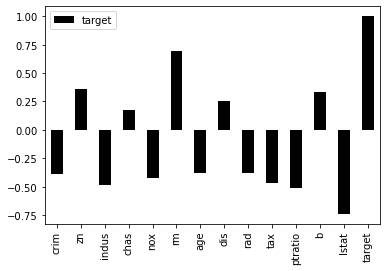

In [3]:
# correlation ranges from -1 to 1
corr = pd_df.corr()
corr[["target"]].plot(kind="bar", color="k")

In [4]:
# Create different scenarios of correlation

perfect_pos_corr = [(x, x + 2) for x in range(1, 11)]
perfect_neg_corr = [
    (x, y) for x, y in zip(range(1, 11), sorted(range(1, 11), reverse=True))
]
np.random.seed(0)
no_corr = [(np.random.randn(500), np.random.randn(500))]

x1, y1 = zip(*perfect_pos_corr)
x2, y2 = zip(*perfect_neg_corr)
x3, y3 = zip(*no_corr)

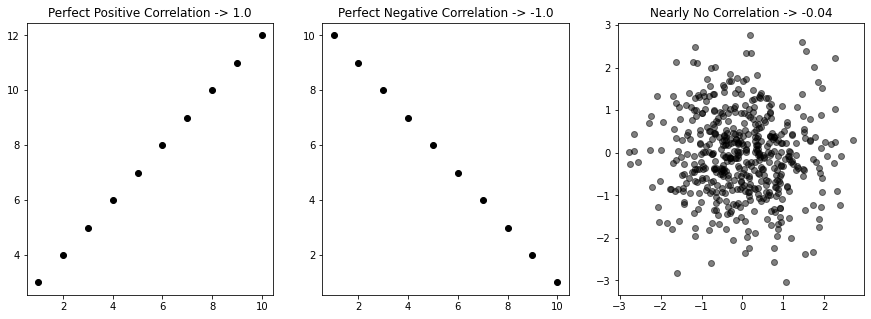

In [5]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))
ax1.scatter(x1, y1, color="k")
ax1.set_title(f"Perfect Positive Correlation -> {round(pearsonr(x1,y1)[0],2)}")
ax2.scatter(x2, y2, color="k")
ax2.set_title(f"Perfect Negative Correlation -> {round(pearsonr(x2,y2)[0],2)}")
ax3.scatter(x3, y3, alpha=0.5, color="k")
ax3.set_title(f"Nearly No Correlation -> {round(pearsonr(x3[0],y3[0])[0],2)}")
plt.show()

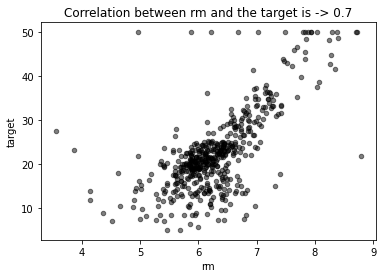

In [6]:
fig, ax = plt.subplots()
subset_df = pd_df.loc[:, ["rm", "target"]]
subset_df.plot(kind="scatter", x="rm", y="target", alpha=0.5, color="k", ax=ax)
ax.set_title(
    f"Correlation between rm and the target is -> {round(subset_df.corr()['target'][0],2)}"
)
plt.show()